In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [80]:
data = pd.read_csv('incidents.csv')
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           2972 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [81]:
data.isnull().sum()

city_name                0
magnitude_of_delay       0
delay_in_seconds         0
affected_roads          85
record_date              0
luminosity               0
avg_temperature          0
avg_atm_pressure         0
avg_humidity             0
avg_wind_speed           0
avg_precipitation        0
avg_rain                 0
incidents             2028
dtype: int64

<Axes: >

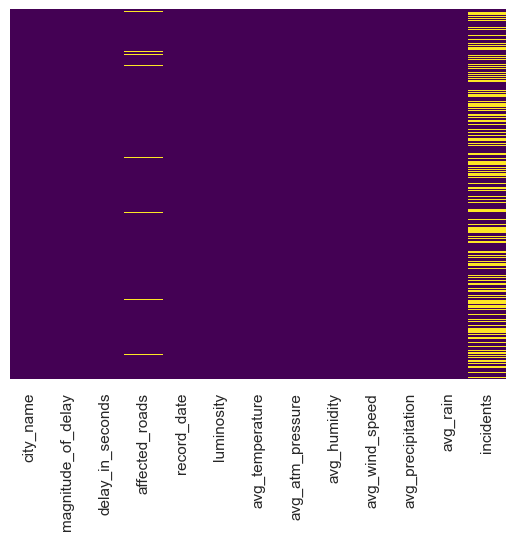

In [82]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [83]:
data[data['affected_roads'].isnull()]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
29,Guimaraes,UNDEFINED,64,NaN,2021-01-22 09:00,LIGHT,8.0,1012.0,91.0,4.0,0.0,Sem Chuva,Medium
76,Guimaraes,UNDEFINED,223,NaN,2021-01-29 08:00,LIGHT,11.0,1022.0,92.0,1.0,0.0,Sem Chuva,High
79,Guimaraes,MAJOR,80,NaN,2021-12-24 21:00,DARK,11.0,1004.0,92.0,0.0,0.0,Sem Chuva,NaN
91,Guimaraes,UNDEFINED,52,NaN,2021-03-02 13:00,LIGHT,13.0,1024.0,78.0,2.0,0.0,Sem Chuva,Low
109,Guimaraes,UNDEFINED,139,NaN,2021-12-27 13:00,LIGHT,15.0,1014.0,88.0,5.0,0.0,Sem Chuva,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,Guimaraes,MAJOR,298,NaN,2021-12-22 13:00,LIGHT,16.0,1015.0,71.0,3.0,0.0,Sem Chuva,NaN
4811,Guimaraes,UNDEFINED,96,NaN,2021-03-11 15:00,LIGHT,13.0,1025.0,89.0,3.0,0.0,chuva fraca,Medium
4838,Guimaraes,UNDEFINED,36,NaN,2021-03-10 13:00,LIGHT,14.0,1025.0,65.0,2.0,0.0,Sem Chuva,Low
4854,Guimaraes,UNDEFINED,233,NaN,2021-01-29 20:00,DARK,11.0,1017.0,92.0,1.0,0.0,Sem Chuva,High


In [84]:
data_m1 = data.copy()
data_m2 = data.copy()
#########################

In [85]:
data_m1.drop(['affected_roads'],axis=1,inplace=True)
data_m1.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,NaN
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,NaN
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [86]:
data_m2.fillna(0,inplace=True)
data_m2.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,0
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,0
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [87]:
data.drop(['affected_roads'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_precipitation   5000 non-null   float64
 10  avg_rain            5000 non-null   object 
 11  incidents           2972 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 468.9+ KB


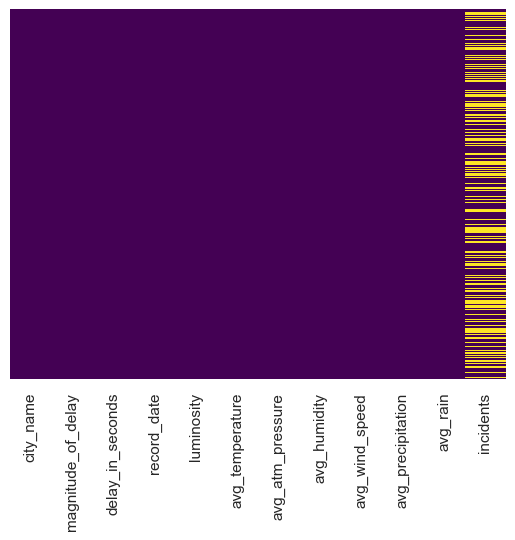

In [88]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data.isnull().sum()
data.info()


In [89]:
data.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                4
dtype: int64

In [90]:
data['avg_temperature'].describe()

count    5000.000000
mean       14.583000
std         4.820514
min         1.000000
25%        11.000000
50%        14.000000
75%        18.000000
max        35.000000
Name: avg_temperature, dtype: float64

In [91]:
#como existe apenas uma cidade fazemos drop
data.drop('city_name',axis=1,inplace=True)
data.dropna(inplace=True)

In [92]:
print(data['incidents'].value_counts())

incidents
High         1073
Low           718
Very_High     603
Medium        578
Name: count, dtype: int64


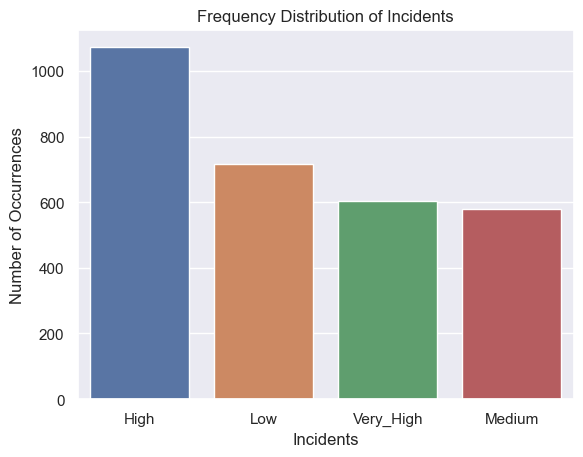

In [93]:
incidents_count = data['incidents'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index,y=incidents_count.values)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Incidents',fontsize=12)
plt.show()

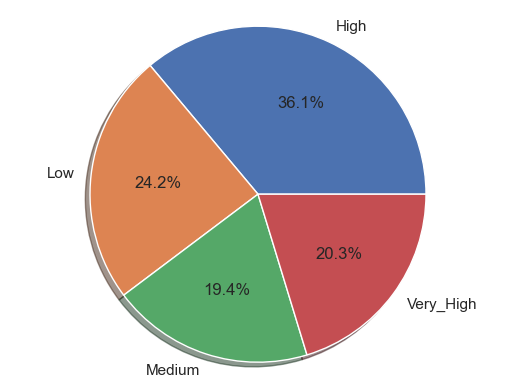

In [94]:
labels = data['incidents'].astype('category').cat.categories.tolist()
counts = data['incidents'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

In [95]:
data_r1 = data.copy()
data_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,Low


In [96]:
replacec_map= {'incidents':{'None':0,'Low':1,'Medium':2,'High':3,'Very_High':4}}
labels = data_r1['incidents'].astype('category').cat.categories.tolist()
replace_map_comp = {'incidents':{k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)

{'incidents': {'High': 1, 'Low': 2, 'Medium': 3, 'Very_High': 4}}


In [97]:
data_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,Low


In [98]:
data_r1.replace(replace_map_comp,inplace=True)
data_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,2
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,4
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,1
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,3
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,2


In [99]:
data_r2 = data.copy()
data_r2.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,Low


In [100]:
print(data_r2.dtypes)

magnitude_of_delay     object
delay_in_seconds        int64
record_date            object
luminosity             object
avg_temperature       float64
avg_atm_pressure      float64
avg_humidity          float64
avg_wind_speed        float64
avg_precipitation     float64
avg_rain               object
incidents              object
dtype: object


In [101]:
data_r2_skl = data.copy()
data_r22 = data.copy()
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data_r2_skl['incidents_code'] = lb_make.fit_transform(data_r22['incidents'])
data_r2_skl.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents,incidents_code
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High,3
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High,0
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,Medium,2
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,Low,1


In [102]:
data_r3 = data.copy()
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(data_r3['incidents'])
lb_results_df = pd.DataFrame(lb_results,columns=lb.classes_)

lb_results_df.head()



,High,Low,Medium,Very_High
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


In [103]:
result_df = pd.concat([data_r3,lb_results_df],axis=1)
result_df.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents,High,Low,Medium,Very_High
2,UNDEFINED,69.0,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low,1.0,0.0,0.0,0.0
3,MAJOR,2297.0,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High,0.0,0.0,1.0,0.0
4,UNDEFINED,0.0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High,0.0,1.0,0.0,0.0
5,UNDEFINED,0.0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,Medium,1.0,0.0,0.0,0.0
6,UNDEFINED,0.0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,Low,0.0,0.0,0.0,1.0


In [104]:
data_r4 = data.copy()
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=["incidents"])
df_binary = encoder.fit_transform(data_r4)
df_binary.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents_0,incidents_1,incidents_2
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,0,0,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,0,1,0
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,0,1,1
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,1,0,0
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,0,0,1


In [105]:
data_r5 = data.copy()
encoder = ce.BackwardDifferenceEncoder(cols=['incidents'])
df_bd = encoder.fit_transform(data_r5)
df_bd.head()

c:\Users\joaop\miniconda3\envs\mypython3version\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
c:\Users\joaop\miniconda3\envs\mypython3version\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents_0,incidents_1,incidents_2
2,1,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,-0.75,-0.5,-0.25
3,1,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,0.25,-0.5,-0.25
4,1,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,0.25,0.5,-0.25
5,1,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,0.25,0.5,0.75
6,1,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,-0.75,-0.5,-0.25


In [106]:
data_r6 = data.copy()
data_r6['incidents']=pd.factorize(data_r6['incidents'])[0]+1
data_r6.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,2
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,3
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,4
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,1


In [107]:
data['incidents'] = pd.factorize(data['incidents'])[0]+1
data.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,2
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,3
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,4
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,1


In [108]:
#data = pd.read_csv('incidents.csv',na_filter=False)
data['magnitude_of_delay']= pd.factorize(data['magnitude_of_delay'])[0]+1
data['luminosity']=pd.factorize(data['luminosity'])[0]+1
data['avg_rain']=pd.factorize(data['avg_rain'])[0]+1
#data.drop(['city_name'],axis=1,inplace=True)

In [109]:
data.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
2,1,69,2021-03-12 15:00,1,14.0,1025.0,64.0,0.0,0.0,1,1
3,2,2297,2021-09-29 09:00,1,15.0,1028.0,75.0,1.0,0.0,1,2
4,1,0,2021-06-13 11:00,1,27.0,1020.0,52.0,1.0,0.0,1,3
5,1,0,2021-12-07 23:00,2,9.0,1015.0,94.0,0.0,0.0,1,4
6,1,0,2021-12-05 05:00,2,8.0,1026.0,87.0,1.0,0.0,1,1


In [110]:
data_dt = data.copy()
data_dt['record_date'].head()

2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
5    2021-12-07 23:00
6    2021-12-05 05:00
Name: record_date, dtype: object

In [111]:
data_dt['record_date'] = pd.to_datetime(data_dt['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')
assert data_dt['record_date'].isnull().sum() == 0 , 'missing record date'
data_dt['record_date'].head()

2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
5   2021-12-07 23:00:00
6   2021-12-05 05:00:00
Name: record_date, dtype: datetime64[ns]

In [113]:
data_dt['record_date_year'] = data_dt['record_date'].dt.year
data_dt['record_date_month'] = data_dt['record_date'].dt.month
data_dt['record_date_day'] = data_dt['record_date'].dt.day
data_dt['record_date_hour'] = data_dt['record_date'].dt.hour
data_dt['record_date_minute'] = data_dt['record_date'].dt.minute

data_dt.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
2,1,69,2021-03-12 15:00:00,1,14.0,1025.0,64.0,0.0,0.0,1,1,2021,3,12,15,0
3,2,2297,2021-09-29 09:00:00,1,15.0,1028.0,75.0,1.0,0.0,1,2,2021,9,29,9,0
4,1,0,2021-06-13 11:00:00,1,27.0,1020.0,52.0,1.0,0.0,1,3,2021,6,13,11,0
5,1,0,2021-12-07 23:00:00,2,9.0,1015.0,94.0,0.0,0.0,1,4,2021,12,7,23,0
6,1,0,2021-12-05 05:00:00,2,8.0,1026.0,87.0,1.0,0.0,1,1,2021,12,5,5,0


In [114]:
data_dt.nunique()

magnitude_of_delay       3
delay_in_seconds      1167
record_date           2972
luminosity               3
avg_temperature         34
avg_atm_pressure        34
avg_humidity            80
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                4
record_date_year         1
record_date_month       11
record_date_day         31
record_date_hour        24
record_date_minute       1
dtype: int64

In [115]:
data_dt.drop('record_date_year',axis=1,inplace=True)
data_dt.drop('record_date_minute',axis=1,inplace=True)
data_dt.drop('record_date',axis=1,inplace=True)
data_dt.dropna(inplace=True)

In [116]:
data_dt2 = data.copy()
data_dt2['record_date']=pd.to_datetime(data_dt2['record_date'])
data_dt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 2 to 4995
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  2972 non-null   int64         
 1   delay_in_seconds    2972 non-null   int64         
 2   record_date         2972 non-null   datetime64[ns]
 3   luminosity          2972 non-null   int64         
 4   avg_temperature     2972 non-null   float64       
 5   avg_atm_pressure    2972 non-null   float64       
 6   avg_humidity        2972 non-null   float64       
 7   avg_wind_speed      2972 non-null   float64       
 8   avg_precipitation   2972 non-null   float64       
 9   avg_rain            2972 non-null   int64         
 10  incidents           2972 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 343.2 KB


In [117]:
data_dt2['record_date'].head()

2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
5   2021-12-07 23:00:00
6   2021-12-05 05:00:00
Name: record_date, dtype: datetime64[ns]

In [118]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2023, 10, 26, 15, 34, 21, 884312)

In [119]:
today - data_dt2['record_date']

2      958 days 00:34:21.884312
3      757 days 06:34:21.884312
4      865 days 04:34:21.884312
5      687 days 16:34:21.884312
6      690 days 10:34:21.884312
                 ...           
4991   761 days 21:34:21.884312
4992   900 days 04:34:21.884312
4993   854 days 23:34:21.884312
4994   854 days 17:34:21.884312
4995   926 days 15:34:21.884312
Name: record_date, Length: 2972, dtype: timedelta64[ns]

In [121]:
(today - data_dt2['record_date']).dt.days

2       958
3       757
4       865
5       687
6       690
       ... 
4991    761
4992    900
4993    854
4994    854
4995    926
Name: record_date, Length: 2972, dtype: int64

In [123]:
data_dt2['day'] = data_dt2['record_date'].dt.day
data_dt2['month'] = data_dt2['record_date'].dt.month
data_dt2['hour'] = data_dt2['record_date'].dt.hour
data_dt2['time'] = data_dt2['record_date'].dt.time

data_dt2.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents,day,month,hour,time
2,1,69,2021-03-12 15:00:00,1,14.0,1025.0,64.0,0.0,0.0,1,1,12,3,15,15:00:00
3,2,2297,2021-09-29 09:00:00,1,15.0,1028.0,75.0,1.0,0.0,1,2,29,9,9,09:00:00
4,1,0,2021-06-13 11:00:00,1,27.0,1020.0,52.0,1.0,0.0,1,3,13,6,11,11:00:00
5,1,0,2021-12-07 23:00:00,2,9.0,1015.0,94.0,0.0,0.0,1,4,7,12,23,23:00:00
6,1,0,2021-12-05 05:00:00,2,8.0,1026.0,87.0,1.0,0.0,1,1,5,12,5,05:00:00


In [124]:
data['record_date'] = pd.to_datetime(data['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 2 to 4995
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  2972 non-null   int64         
 1   delay_in_seconds    2972 non-null   int64         
 2   record_date         2972 non-null   datetime64[ns]
 3   luminosity          2972 non-null   int64         
 4   avg_temperature     2972 non-null   float64       
 5   avg_atm_pressure    2972 non-null   float64       
 6   avg_humidity        2972 non-null   float64       
 7   avg_wind_speed      2972 non-null   float64       
 8   avg_precipitation   2972 non-null   float64       
 9   avg_rain            2972 non-null   int64         
 10  incidents           2972 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 343.2 KB


In [125]:
data.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
2,1,69,2021-03-12 15:00:00,1,14.0,1025.0,64.0,0.0,0.0,1,1
3,2,2297,2021-09-29 09:00:00,1,15.0,1028.0,75.0,1.0,0.0,1,2
4,1,0,2021-06-13 11:00:00,1,27.0,1020.0,52.0,1.0,0.0,1,3
5,1,0,2021-12-07 23:00:00,2,9.0,1015.0,94.0,0.0,0.0,1,4
6,1,0,2021-12-05 05:00:00,2,8.0,1026.0,87.0,1.0,0.0,1,1


<Axes: >

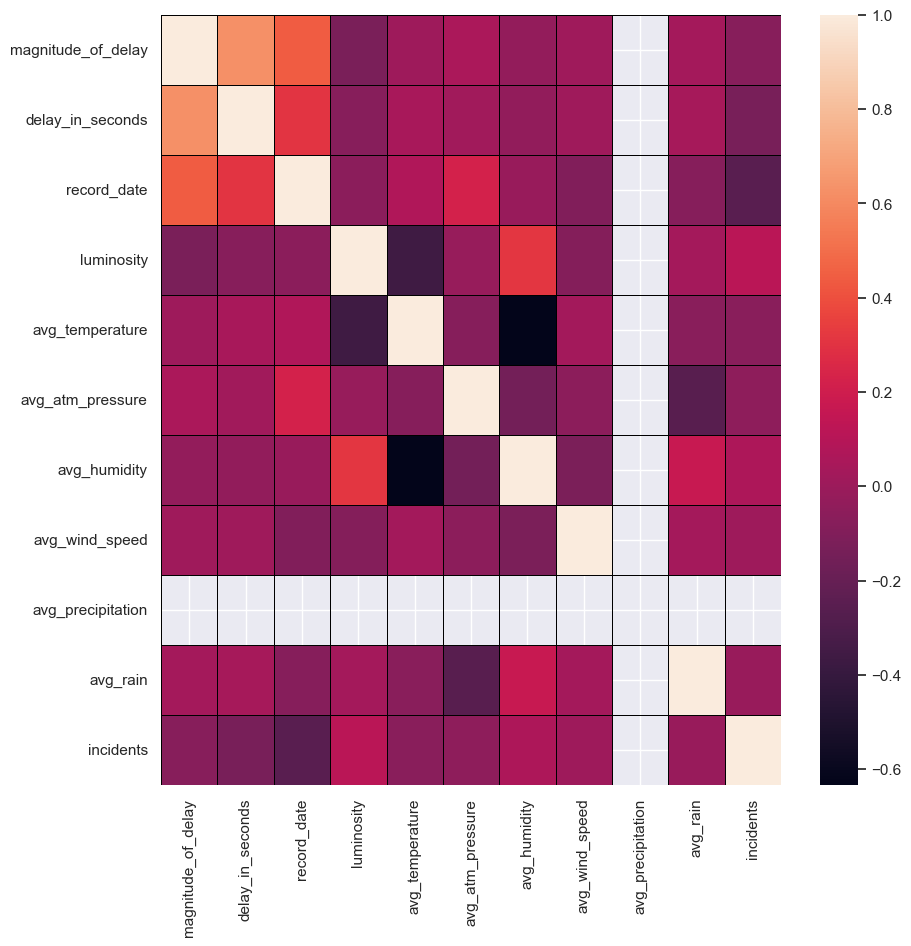

In [126]:
fig = plt.figure(figsize=(10,10))
incidents_corr = data.corr(method='pearson')
sns.heatmap(incidents_corr,linecolor='black',linewidths=0.5)